#### Load boston dataset

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Convert data to pandas for some exploration

In [2]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


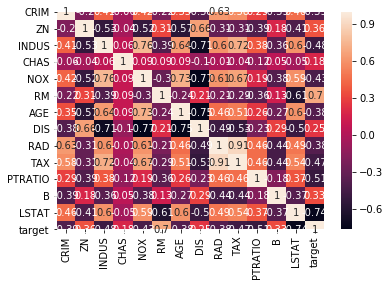

In [4]:
import seaborn as sns 

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Split data to train and test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2)


###### Run simple linear regression and evaluate the model

In [7]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
print(lin_model.coef_)

[-1.08026314e-01  4.71242130e-02 -1.14910508e-02  2.84798039e+00
 -1.71180748e+01  3.44404980e+00  1.10069333e-02 -1.48561354e+00
  2.91690119e-01 -1.14938872e-02 -8.90120183e-01  1.00916854e-02
 -5.84254653e-01]


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate(model, X, y):
    predicted = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(y, predicted)))
    r2 = r2_score(y, predicted)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))


print("Training set")
evaluate(lin_model, X_train, y_train)

print("Test set")
evaluate(lin_model, X_test, y_test)


Training set
RMSE is 4.76588541530102
R2 score is 0.7302103140914256
Test set
RMSE is 4.389360029462834
R2 score is 0.7737391991299609


Run lasso and evaluate the model.
Try with different values of alpha.
Check coeffecient (parameter) values w.r.t LinearRegression models, compare the correlation of features with zero coeffecient to the target variable.

In [9]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.3)

clf.fit(X_train, y_train)
print(clf.coef_)
evaluate(clf, X_train, y_train)
evaluate(clf, X_test, y_test)

[-0.09297801  0.04843719 -0.03833     0.         -0.          2.737054
  0.010943   -1.03870579  0.27044387 -0.01427898 -0.737628    0.01188587
 -0.68935867]
RMSE is 4.929529574002516
R2 score is 0.7113649271084456
RMSE is 4.760597114118674
R2 score is 0.733847978603947


Run feature selection and select top 3 feature to run linear regression and see their performance

In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
selector.scores_

array([ 65.30837856,  55.08626076, 110.40629185,  14.38946757,
        94.94545846, 347.65865057,  60.75611134,  24.8460213 ,
        55.70560397,  95.31138359, 106.24880616,  41.9631608 ,
       487.0931348 ])

In [11]:
clf = Lasso(alpha=0.4)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
clf.fit(X_train_selected, y_train)
print(clf.coef_)
evaluate(clf, X_train_selected, y_train)
evaluate(clf, X_test_selected, y_test)

[-0.04362561  3.45395482 -0.71618062]
RMSE is 5.628061095374499
R2 score is 0.6237679785349572
RMSE is 5.427641722906558
R2 score is 0.6540373177846553


Regularization should be done with scaled features, so that all the coeffecient are treated similarly (on same scale)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

clf = Lasso(alpha=0.8)
clf.fit(X_train_sc, y_train)
print(clf.coef_)

evaluate(clf, X_train_sc, y_train)
evaluate(clf, X_test_sc, y_test)

[-0.          0.         -0.          0.24307325 -0.          2.62781104
  0.         -0.         -0.         -0.         -1.22265264  0.40470819
 -3.82557786]
RMSE is 5.333376734028284
R2 score is 0.6621354132909711
RMSE is 4.874970851130413
R2 score is 0.7209057060534116


In [13]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=3, random_state=2)

reg.fit(X_train_sc, y_train)

evaluate(reg, X_train_sc, y_train)
evaluate(reg, X_test_sc, y_test)

RMSE is 4.767358332113727
R2 score is 0.7300435290618805
RMSE is 4.385704690412672
R2 score is 0.774115889836094


Run Ridge regression and check that even with very large value of alpha, the coefficients never become zero.

In [14]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1000)
clf.fit(X_train, y_train)
print(clf.coef_)

evaluate(clf, X_train, y_train)
evaluate(clf, X_test, y_test)

[-0.0873657   0.05337052 -0.04292367  0.09022198 -0.0094486   0.44794858
  0.04268177 -0.52013577  0.28594531 -0.01563551 -0.56446934  0.0101532
 -0.80934745]
RMSE is 5.319739866675196
R2 score is 0.6638609708322579
RMSE is 5.407460979213887
R2 score is 0.6566052118865706


Run LinearRegression with polynomial features. Note the coefficients - some of them are very big and most are big (i.e compared to the error they are not small)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(poly.fit_transform(X_train))
X_test_sc = scaler.transform(poly.transform(X_test))

clf = LinearRegression()
clf.fit(X_train_sc, y_train)
print(clf.coef_)

evaluate(clf, X_train_sc, y_train)
evaluate(clf, X_test_sc, y_test)

[ 1.18055415e-11 -5.08953593e+01 -6.26220318e+00 -3.90230890e+01
  7.36906821e+00  1.71017242e+01  1.60284854e+01  2.79131740e+01
 -1.16592412e+01  3.45323064e+01  2.33745269e+00  1.30721183e+01
  8.47098716e+00 -7.27213624e+00  8.68513769e-01  5.45202773e-01
  3.35380398e+01  2.67431144e+00 -6.62926208e+00  3.94319014e+00
 -4.76729631e+00 -2.75583205e+00 -1.82094317e+00 -2.99702340e+01
  5.50084141e+01 -1.31498318e+00  3.51432639e+00 -1.70234670e+00
 -6.86191297e-01 -5.23254150e-02 -1.13683202e+01  7.37880511e+00
 -3.63955745e-01 -1.22176603e+00 -8.13230971e-01  3.81194344e+00
 -1.37686196e+00  1.30683053e+01  3.53995421e-01  7.20547842e+00
  1.85008158e+00  1.14951919e+01  9.57701297e+00  3.68800112e+00
  3.86606920e+00 -8.31072976e+00  5.05395795e+00 -1.89110679e-01
  6.62669795e+00 -2.14232105e+00  7.36906821e+00 -5.82768575e+00
 -7.49143974e+00  1.00886469e+00  1.84889095e+00  2.44536070e+00
 -5.40479110e+00 -6.09056929e+00  1.92162314e+00 -1.09990037e-01
 -4.56732926e+00 -1.00988

Run with Lasso and compare the coeffecients.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(poly.fit_transform(X_train))
X_test_sc = scaler.transform(poly.transform(X_test))

clf = Lasso(alpha=0.4)
clf.fit(X_train_sc, y_train)
print(clf.coef_)

evaluate(clf, X_train_sc, y_train)
evaluate(clf, X_test_sc, y_test)

[ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.          0.         -0.         -0.83769204
  0.         -0.         -0.          0.         -0.          0.96806403
 -0.         -0.41795889 -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.         -0.34532742  0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.40184315  0.         -0.
 -0.61699626  0.         -0.          3.26875852 -0.         -0.
  0.         -0.         -0.          0.60581142 -3.70256948  0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.          0.         -0.62162507 -0.         -0.         -0.
  0.     

In [17]:
# powers_[i, j] is the exponent of the jth input in the ith output.
poly.powers_

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 2]])

Which are the most important polynomial features. Does it make sense when you look at the description of the features below?

In [18]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu